## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [5]:
(len(df[df['converted']==1]))/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
len(df.query("group == 'treatment' & landing_page == 'old_page'")) + len(df.query("group == 'control' & landing_page == 'new_page'"))

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query("group == 'treatment' & landing_page == 'new_page'| group == 'control' & landing_page == 'old_page' ") 

In [9]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2[df2['timestamp'] != '2017-01-09 05:37:58.781806']

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
len(df2[df2['converted'] == 1])/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
len(df2[(df2['group']=='control') & (df2['converted'] == 1)]) / len(df2[df2['group'] == 'control']) 

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
len(df2[(df2['group']=='treatment') & (df2['converted'] == 1)]) / len(df2[df2['group'] == 'treatment']) 

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
len(df2[(df2['landing_page']=='new_page')])/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Based off of the above results, I would say that there is not sufficient evidence to confirm wether the new treatment page has led to more customer conversions. Considering that that new treatment page has essentially the same conversion rate as the control group, it does not show any indication of being more effective. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>null: p_old > p_new
>>alternative: p_new >= p_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2['converted'].mean()
print (p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2['converted'].mean()
print (p_new)

0.11959708724499628


c. What is $n_{new}$?

In [21]:
n_new = len(df2[df2['group'] == 'treatment'])
print (n_new)

145310


d. What is $n_{old}$?

In [22]:
n_old = len(df2[df2['group'] == 'control'])
print (n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new,(1-p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old,(1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted - old_page_converted

ValueError: operands could not be broadcast together with shapes (145310,) (145274,) 

In [26]:
#we note in the above error that we can't directly find the diffrence between the two because of diffrent size,
#considering that our diffrence is rather small, we can truncate our new_page_converted 
new_page_converted = new_page_converted[:145274]

In [27]:
p_diff = new_page_converted/n_new - old_page_converted/n_old

In [28]:
p_diff

array([  6.88183883e-06,   0.00000000e+00,   0.00000000e+00, ...,
         6.88183883e-06,  -6.88354420e-06,   0.00000000e+00])

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new,(1-p_new)]).mean()
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old,(1-p_old)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,0,'P-Diffs')

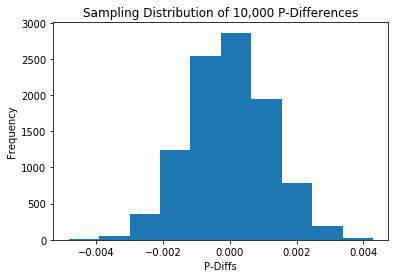

In [30]:
plt.hist(p_diffs)
plt.title('Sampling Distribution of 10,000 P-Differences')
plt.ylabel('Frequency')
plt.xlabel('P-Diffs')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
obs_diffs = df[df['group'] == 'treatment']['converted'].mean() - df[df['group'] == 'control']['converted'].mean()
obs_diffs

-0.0014795997940775518

In [32]:
p_diffs = np.array(p_diffs)

In [33]:
# the proportion of the p_diffs that are greater than the actual difference observed 
(p_diffs > obs_diffs).mean()

0.89000000000000001

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In this section we have gone through the process of calculating p_values. As noted in the video walk-throughs in this section, p-values (the smaller a p_value) indicate the strengh/valididty of rejecting our null-hypothesis. In our case we have generated a very high p_value therefore we cannot reject our null hypothesis. This means that there is no given advanatge in the new webpage. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [51]:
import statsmodels.api as sm

convert_old = df.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new =  df.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df[df['group'] == 'control'].shape[0]
n_new = df[df['group'] == 'treatment'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [53]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print(z_score, p_value)

1.41860928113 0.921993520735


In [55]:
from scipy.stats import norm

# Tells us how significant our z-score is
z_sig = norm.cdf(z_score)

#Tells us what our critical value at 95% confidence is
crit_val = norm.ppf(1-(0.05/2))

print(z_sig, crit_val)

0.921993520735 1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Because our z_score (1.41860928113)  is below the critical value of (1.95996398454) we fail to reject the null hypothesis. Meaning that there is no statisical signifcance in the new page having a higher conversion rate than the old page. These findings do indeed agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [63]:
df['intercept'] = 1
df[['treatment', 'control']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [67]:
logit_mod = sm.Logit(df['converted'], df[['intercept','treatment']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Aug 2018   Pseudo R-squ.:               7.093e-06
Time:                        14:00:41   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0027      0.008   -248.781      0.000      -2.018      -1.987
treatment      0.0140      0.011      1.237      0.216      -0.008       0.036
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p_values differ because in part two we are doing a one sided test checking for inequality but in part three we are conducting a two sided test like below. **
>Null: P_new - P_old = 0
>>Alternative: P_new - P_old =! 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea to include other factors into our regression model because we can further see the impact that these factors will have on individual converts. Factors such as age of the user, geographic location, race, education, can all further influence whether or not an individual converts. Disadvantages in regards to adding additional terms into our regression model include not being able to every fully capture all instances that may influence the decision to convert.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [81]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [82]:
### Create the necessary dummy variables
df_new['intercept'] = 1
df_new[['US', 'UK']] = pd.get_dummies(df_new['country'])[['US','UK']]

In [83]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,US,UK
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [87]:
### Fit Your Linear Model And Obtain the Results
logit_mod_new = sm.Logit(df_new['converted'], df_new[['intercept','US','UK']])
results_new = logit_mod_new.fit()
results_new.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Aug 2018   Pseudo R-squ.:               1.521e-05
Time:                        14:25:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [88]:
np.exp(results_new.params)

intercept    0.130350
US           1.041647
UK           1.052027
dtype: float64

In [89]:
1/_

0.00010001000100010001

In [91]:
df_new.groupby('group')['converted'].mean()

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

## Conclusions From Regression Results:
Based off of the results in our logistic regression model using our newly added geographic data, we can still see that the control group performs slightly better than the treatment page. In this case, we can accept the null hypothese and continue to use the original page.

<a id='conclusions'></a>
## Conclusions

In all cases we have noted that the conversion rate of the control group has been slightly better than the conversion rate in the treatment page. Based off of these results we can accept the null hypotheses in all cases, and reject the use of the new page. Although the results were minimally better, they show that there is no advanatge in deploying the new page. Because we know that these inferences are made stricly with the data in which we have on hand, we cannot say that our analysis is completely inclusive as there are numerous other factors that can impact the decision to convert or not.

## Resources

-  All of the videos, tutorials, and walkthroughs in the Practical Statistics Udacity Module 
-  http://knowledgetack.com/python/statsmodels/proportions_ztest/
-  https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html
-  https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
-  https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/